In [6]:
import pandas as pd
df=pd.read_csv('daily-min-temperatures.csv',parse_dates=['Date'])
df.head()

,Date,Temp
0,1981-01-01,20.7
1,1981-01-02,17.9
2,1981-01-03,18.8
3,1981-01-04,14.6
4,1981-01-05,15.8


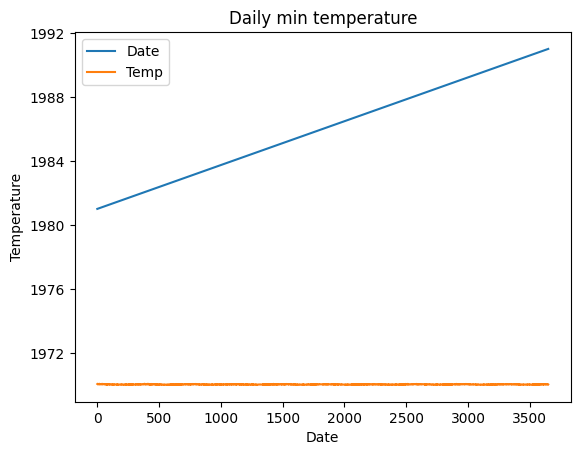

In [11]:
import matplotlib.pyplot as plt
df.plot()
plt.title('Daily min temperature')
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.show()

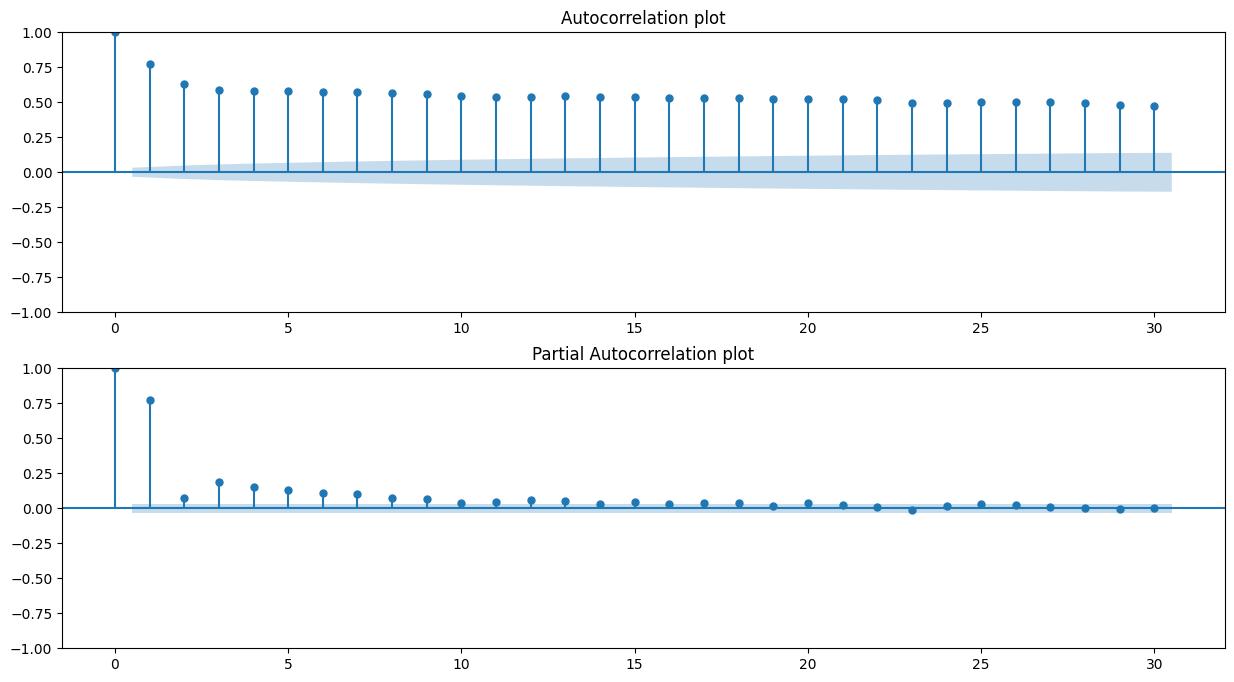

In [18]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
fig,axes=plt.subplots(2,1,figsize=(15,8))
plot_acf(df['Temp'],lags=30,ax=axes[0],title='Autocorrelation plot')
plot_pacf(df['Temp'],lags=30,ax=axes[1],title='Partial Autocorrelation plot')
plt.show()

In [39]:
import numpy as np
from statsmodels.tsa.arima_process import ArmaProcess
np.random.seed(123)

#MA(1)
ar_p2=np.array([0])
ma_p2=np.array([0.65])
ar_process2=ArmaProcess(ar_p2,ma_p2)
ma_data=ar_process2.generate_sample(nsample=len(df['Temp']))
ma_data=pd.Series(ma_data)

#MA(1) plot
plt.subplot(2,2,3)
plot_acf(ma_data,lags=20,ax=plt.gca(),title='ACF for MA(1) model')
plt.subplot(2,2,4)
plot_pacf(ma_data,lags=20,ax=plt.gca(),title='PACF for MA(1) model')

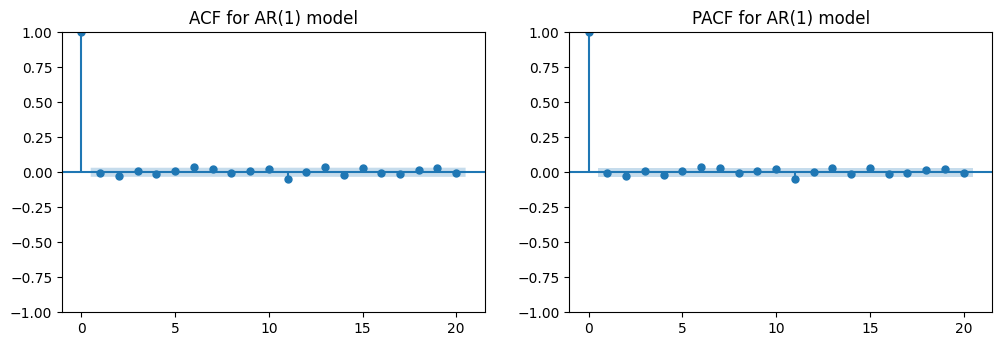

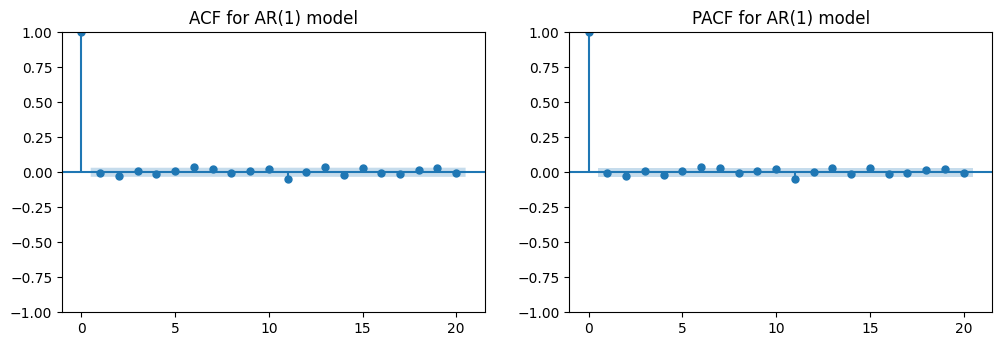

In [60]:
#ACF and PACF for AR(1) and MA(1)
#Coeff => AR->(0.75) & MA->(0.65)
#AR(1)
ar_p1=np.array([0.75])
ma_p1=np.array([0.65])
ar_process1=ArmaProcess(ar_p1,ma_p1)
ar_data=ar_process1.generate_sample(nsample=len(df['Temp']))
ar_data=pd.Series(ar_data)


#AR(1) plot
plt.figure(figsize=(12,8))
plt.subplot(2,2,1)
plot_acf(ar_data,lags=20,ax=plt.gca(),title='ACF for AR(1) model')
plt.subplot(2,2,2)
plot_pacf(ar_data,lags=20,ax=plt.gca(),title='PACF for AR(1) model')



C:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\signal\_signaltools.py:2134: RuntimeWarning: divide by zero encountered in divide
  b /= a[0]
C:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\stattools.py:693: RuntimeWarning: invalid value encountered in divide
  acf = avf[: nlags + 1] / avf[0]
C:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\matplotlib\axes\_base.py:2503: UserWarning: Warning: converting a masked element to nan.
  xys = np.asarray(xys)
C:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\regression\linear_model.py:1490: ValueWarning: Matrix is singular. Using pinv.
  warnings.warn("Matrix is singular. Using pinv.", ValueWarning)
C:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\_methods.py:181: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
C:\U

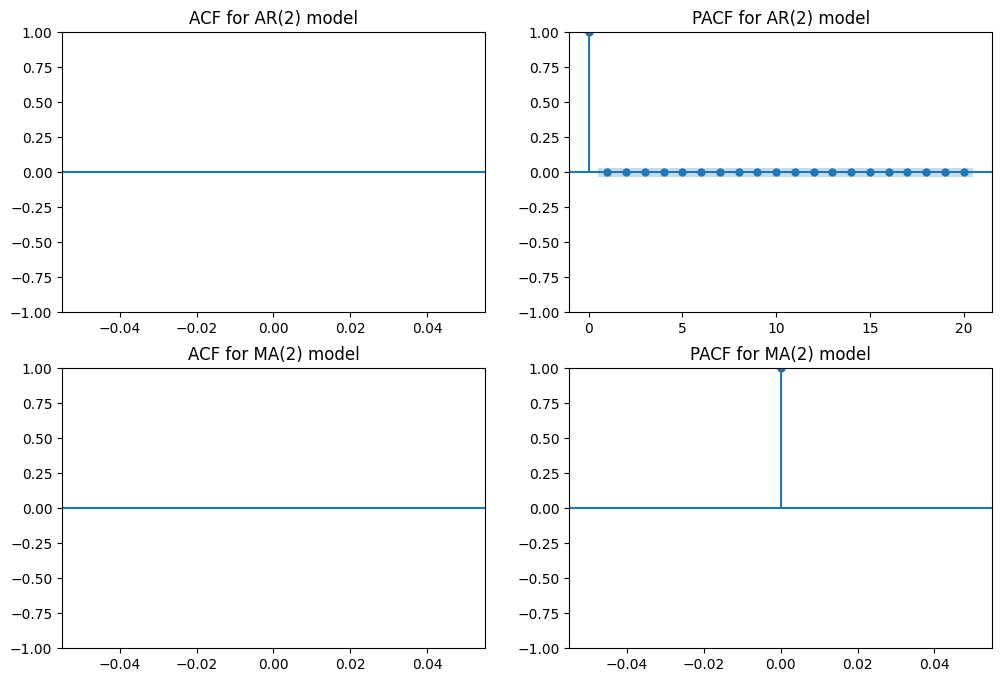

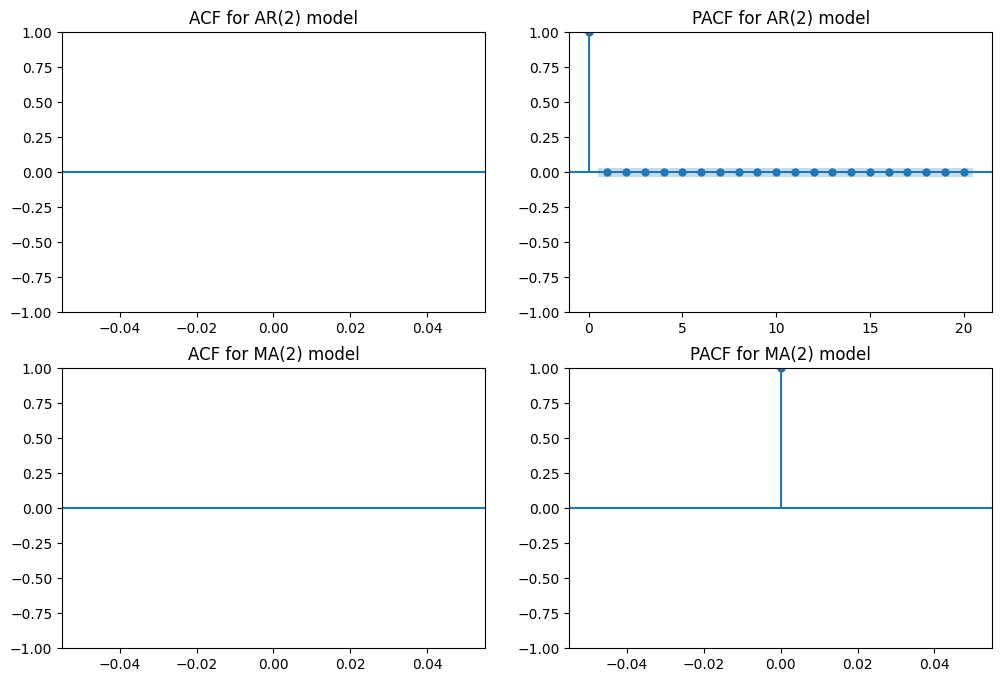

In [58]:
#ACF and PACF for AR(1) and MA(1)
#Coeff => AR->(0.75,-0.25) & MA->(0.65,0.2)
#AR(2)
ar_p1=np.array([0.75,-0.25])
ma_p1=np.array([0])
ar_process1=ArmaProcess(ar_p1,ma_p1)
ar_data=ar_process1.generate_sample(nsample=len(df['Temp']))
ar_data=pd.Series(ar_data)

#MA(2)
ar_p2=np.array([0])
ma_p2=np.array([0.65,0.2])
ar_process2=ArmaProcess(ar_p2,ma_p2)
ma_data=ar_process2.generate_sample(nsample=len(df['Temp']))
ma_data=pd.Series(ma_data)

#AR(2) plot
plt.figure(figsize=(12,8))
plt.subplot(2,2,1)
plot_acf(ar_data,lags=20,ax=plt.gca(),title='ACF for AR(2) model')
plt.subplot(2,2,2)
plot_pacf(ar_data,lags=20,ax=plt.gca(),title='PACF for AR(2) model')

#MA(2) plot
plt.subplot(2,2,3)
plot_acf(ma_data,lags=20,ax=plt.gca(),title='ACF for MA(2) model')
plt.subplot(2,2,4)
plot_pacf(ma_data,lags=20,ax=plt.gca(),title='PACF for MA(2) model')